In [1]:
import pandas as pd
df=pd.read_csv("d:/data/concrete/concrete.csv") #데이터셋 로딩
df.head()

,cement,flag,ash,water,superplastic,coarseagg,findagg,age,strength,class
0,164.2,0.0,200.1,181.2,12.6,849.3,846.0,28,15.09,0
1,164.0,0.0,200.0,181.0,13.0,849.0,846.0,28,15.09,0
2,158.0,0.0,195.0,220.0,11.0,898.0,713.0,28,8.54,0
3,144.0,15.0,195.0,176.0,6.0,1021.0,709.0,28,15.34,0
4,167.0,187.0,195.0,185.0,7.0,898.0,636.0,28,23.89,0


In [2]:
train_cols=df.columns[0:8]
X=df[train_cols] #독립변수
y=df["class"] #종속변수

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
#데이터셋을 8:2로 구분
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                               random_state=10)
#트리 모형 생성
model=DecisionTreeClassifier(random_state=0)
#모형 훈련
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [4]:
#예측도 확인
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.9975728155339806
0.9029126213592233


In [5]:
#트리 모형 생성(최대 질문 단계를 4로 조정)
model=DecisionTreeClassifier(max_depth=4,random_state=0)
#모형 훈련
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [6]:
#예측도 확인
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.8774271844660194
0.8640776699029126


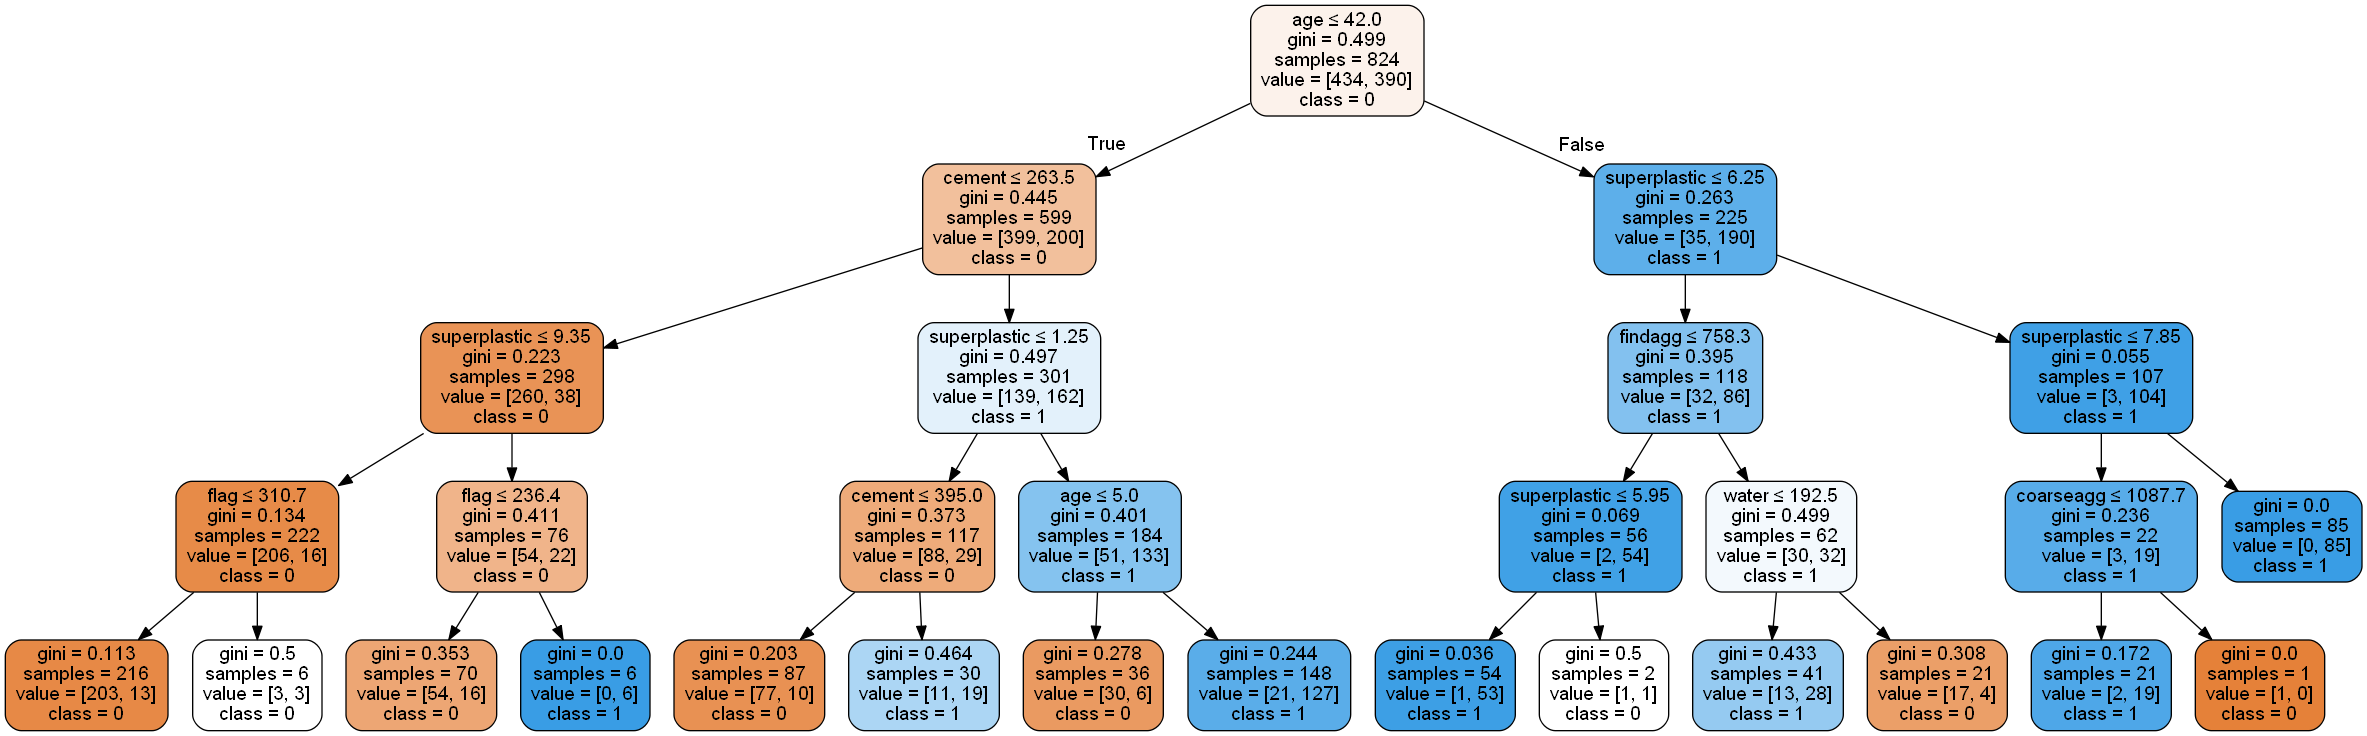

In [7]:
from sklearn.tree import export_graphviz
import pydotplus 
import graphviz
from IPython.display import Image

dot_data=export_graphviz(model,out_file=None,
    feature_names=train_cols, class_names=["0","1"],
    filled=True, rounded=True, special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data)    
Image(graph.create_png())

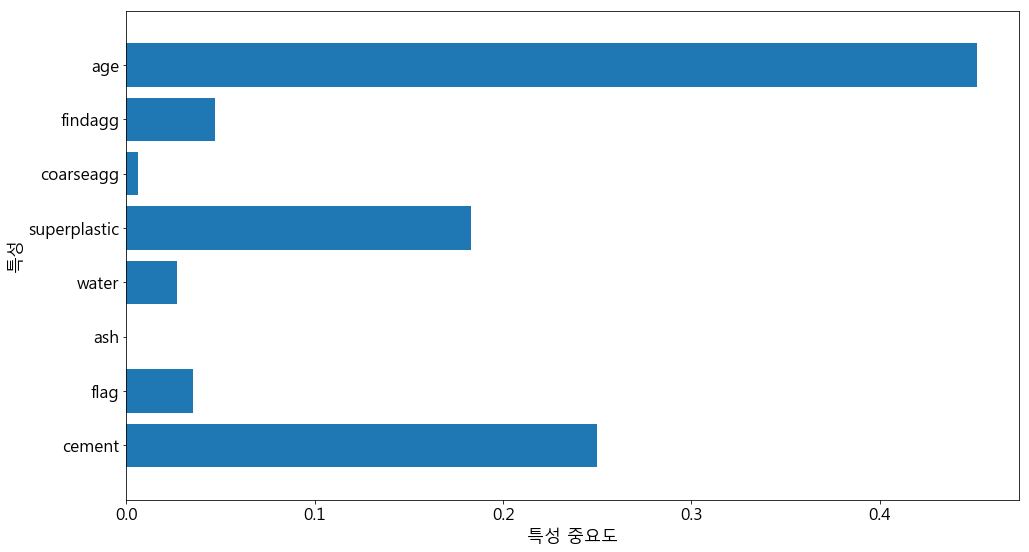

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc
font_name=font_manager.FontProperties(fname="c:/windows/fonts/malgun.ttf").get_name()
rc("font",family=font_name)

def plot_tree(model):
    n_features=X.shape[1] #독립변수의 갯수
    plt.rcParams["figure.figsize"]=(16,9) #그래프의 가로,세로 인치
    plt.rcParams["font.size"]=17 #그래프의 폰트 사이즈
    plt.barh(range(n_features),model.feature_importances_,
             align="center")
    plt.yticks(np.arange(n_features),train_cols) 
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1,n_features)
    
plot_tree(model)     #특성 중요도 그래프 출력
# age > cement > superplastic

In [11]:
from sklearn.ensemble import RandomForestClassifier
#랜덤포레스트 모델 생성
#n_estimators : 트리갯수
forest=RandomForestClassifier(
    n_estimators=100,random_state=100)
forest.fit(X_train, y_train)  #모델 훈련

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [12]:
print(forest.score(X_train,y_train)) #학습용 데이터셋의 정확도
print(forest.score(X_test,y_test)) #검증용 데이터셋의 정확도

0.9975728155339806
0.9271844660194175


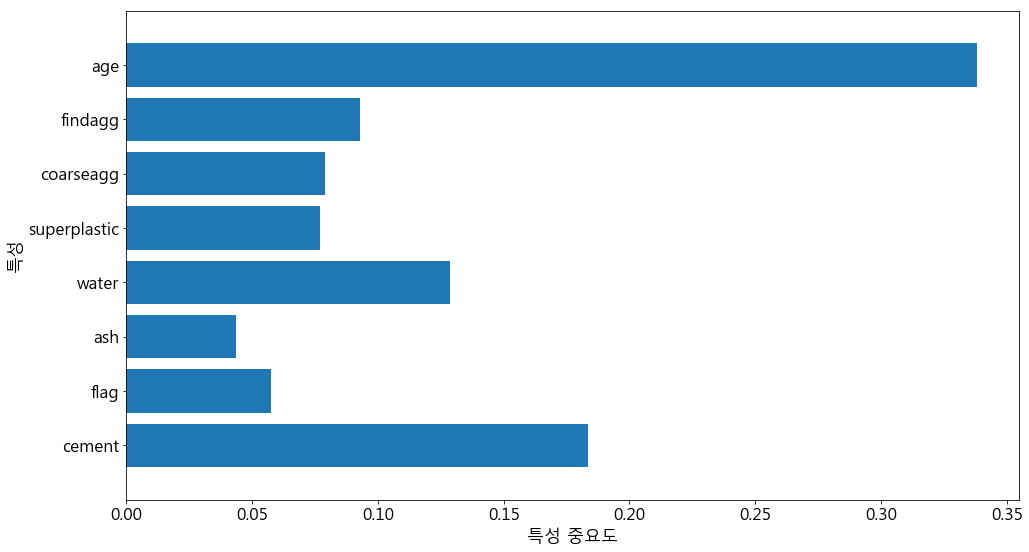

In [13]:
plot_tree(forest) #트리보다 좀더 다양한 시각으로 데이터를 분석